In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Loading data into dataframe
data = pd.read_csv("/Users/ramkumarmv/Desktop/suicide_data.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [5]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Visualizing the data:

/var/folders/69/qgpqrc391t78n_91cv91xklh0000gn/T/ipykernel_1229/1114425786.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Oranges')


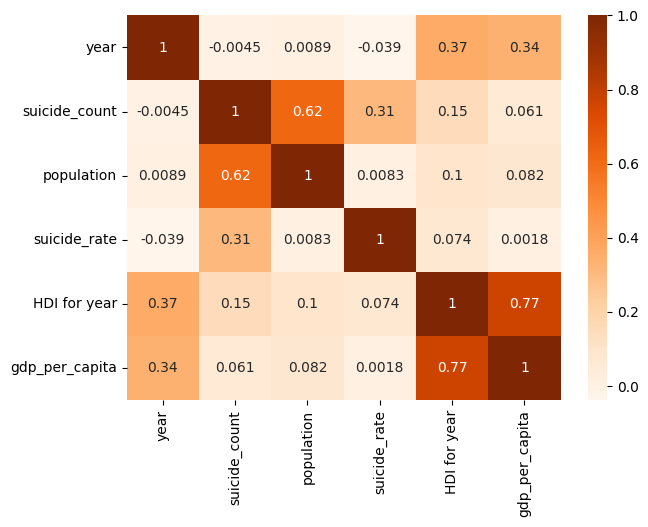

In [6]:
#Correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

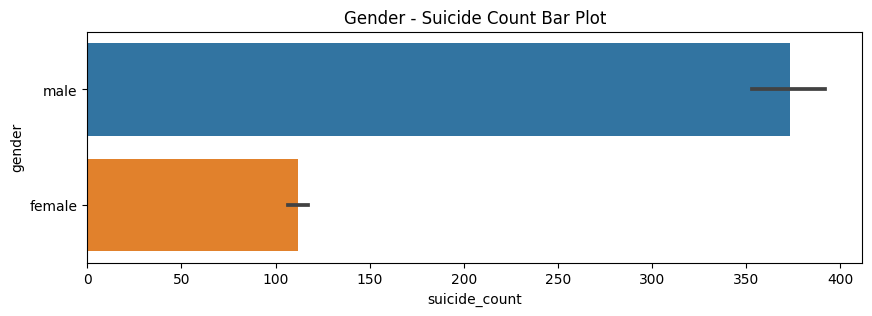

In [7]:
#Gender and suicide count bar plot

plt.figure(figsize=(10,3))
sns.barplot(x=data.suicide_count,y=data.gender)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()

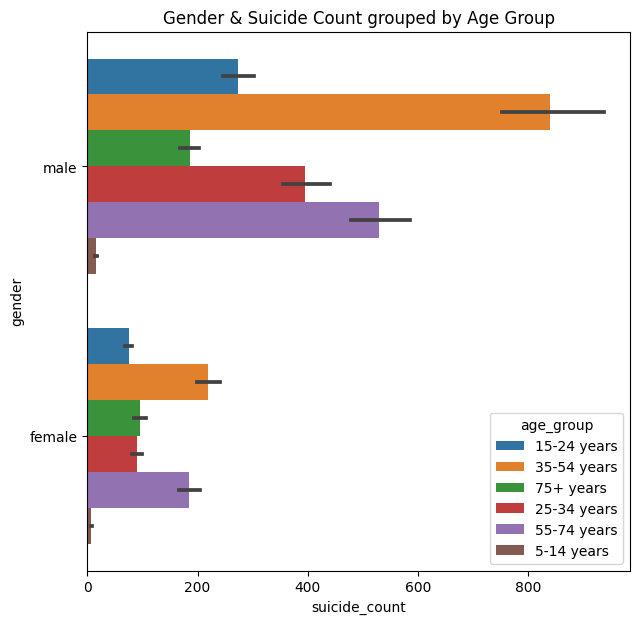

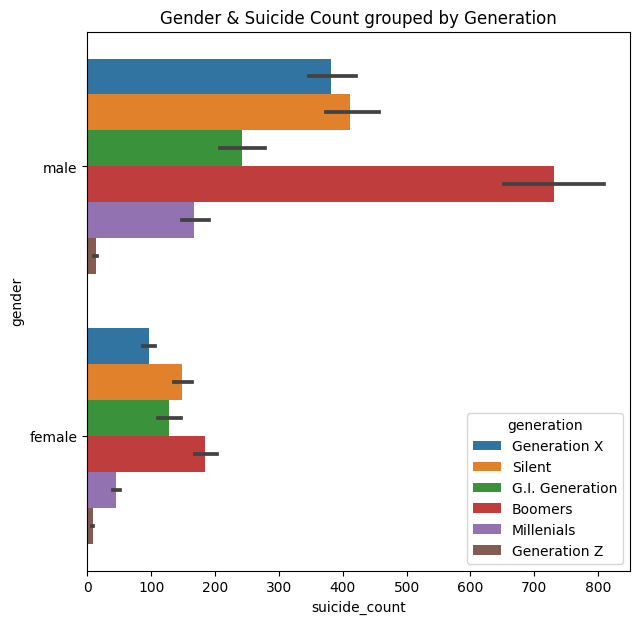

In [8]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="gender", x="suicide_count", hue="age_group", data=data)
plt.title('Gender & Suicide Count grouped by Age Group')
plt.show()

#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="gender", x="suicide_count", hue="generation", data=data)
plt.title('Gender & Suicide Count grouped by Generation')
plt.show()

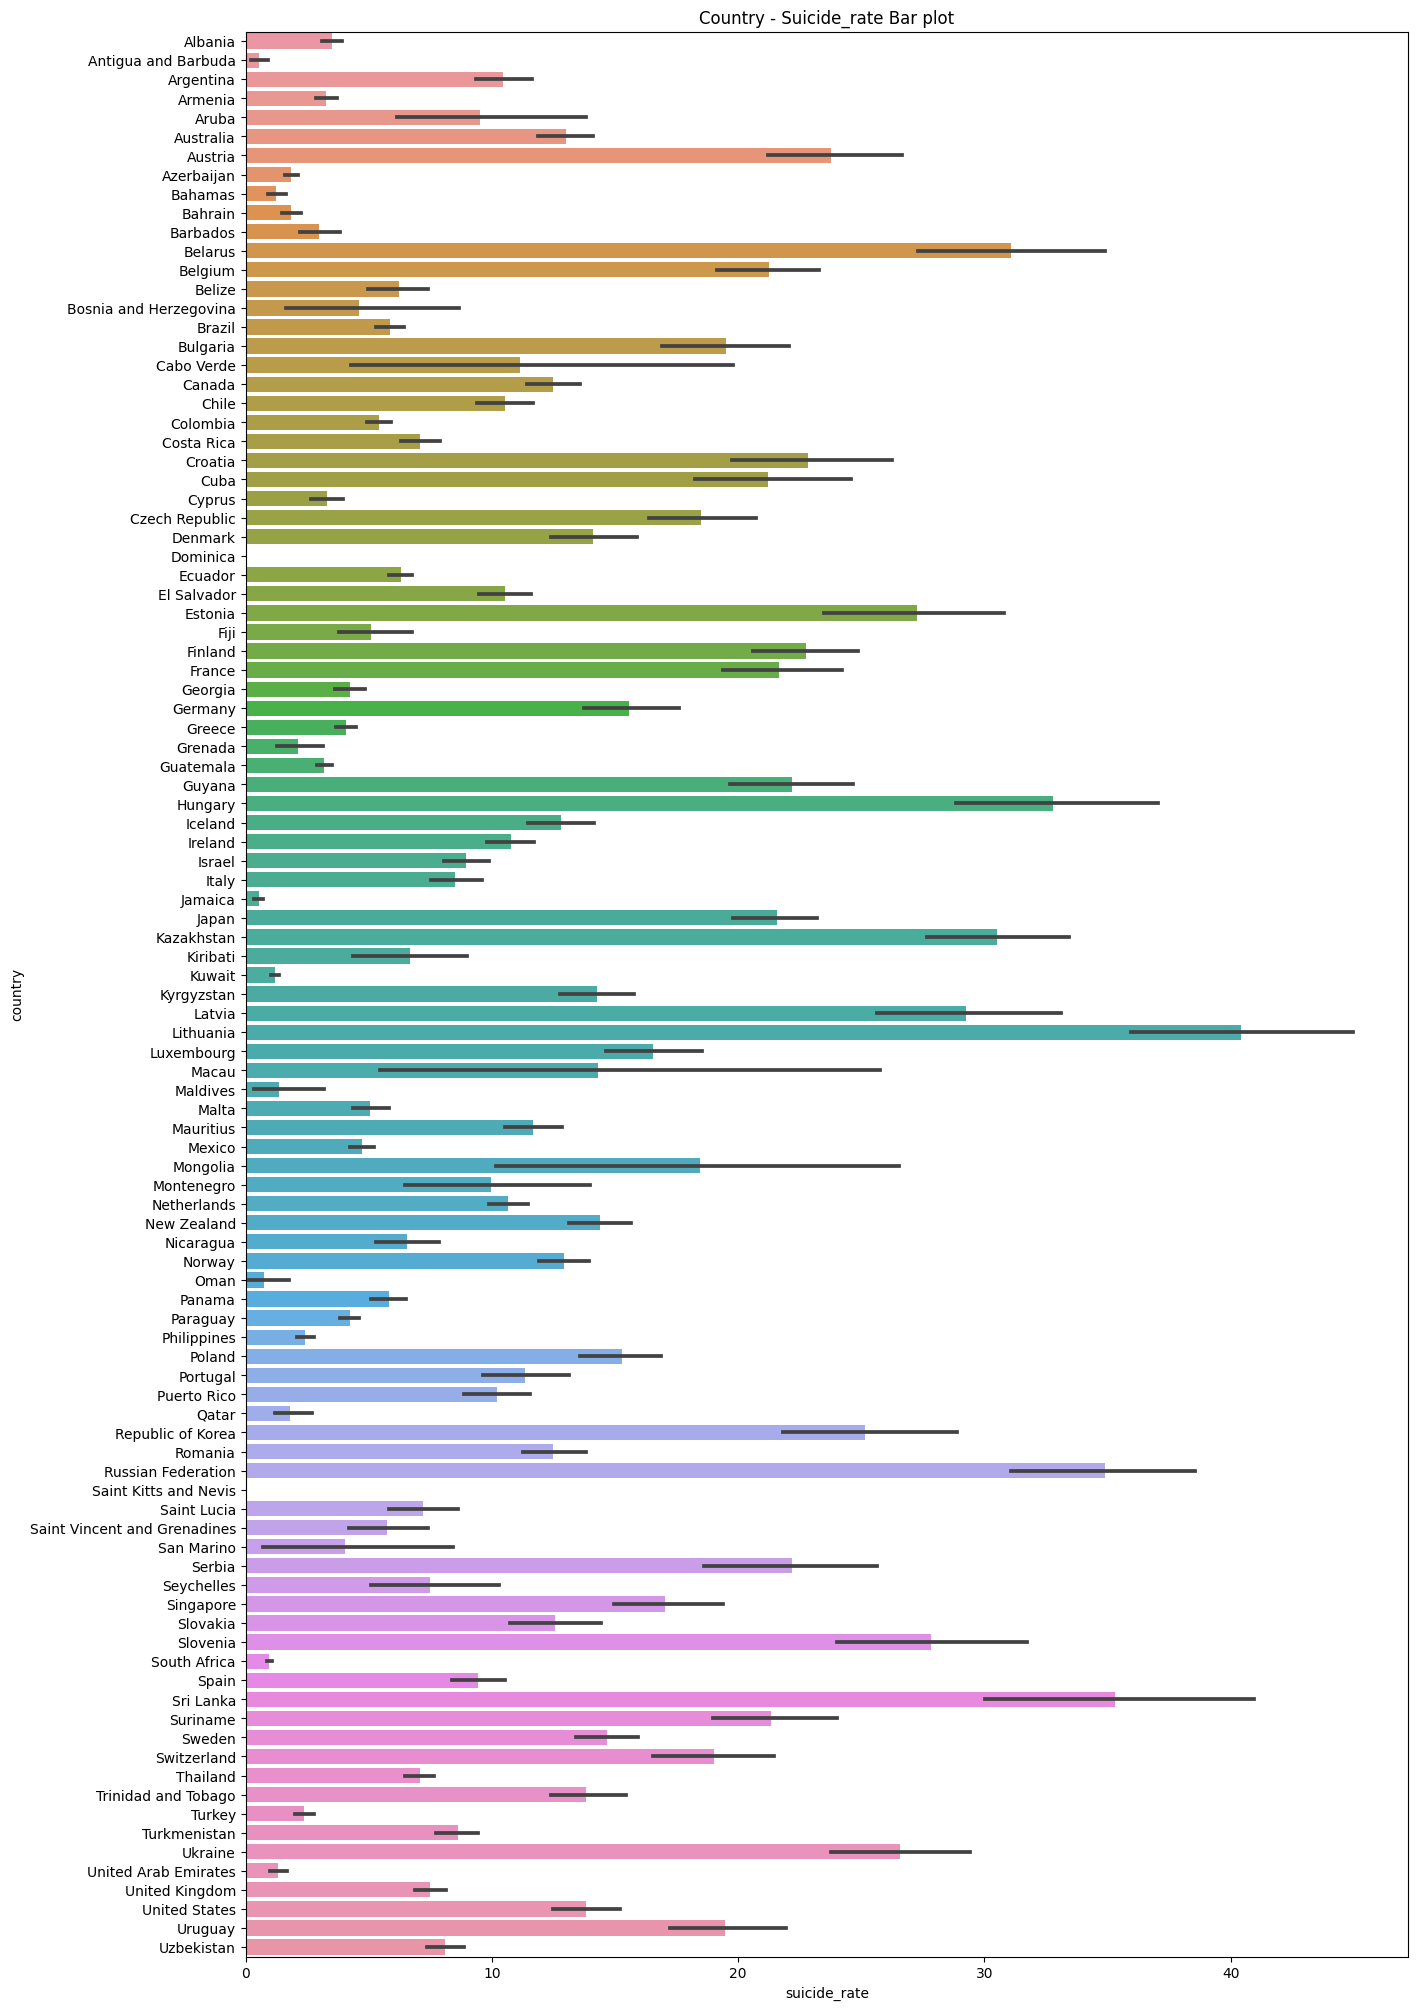

In [9]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

Data Preprocessing & EDA:

In [10]:
data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [11]:
data = data.drop(['HDI for year'], axis = 1)
data = data.drop(['country-year'], axis = 1)
data = data.dropna()
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [12]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age_group', 'gender', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [13]:
# Converting the column 'gdp_for_year' to float from object

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)
#Scaling the numerical data columns with RobustScalar

numerical = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,2,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5
2,0,2,0,0,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,1
4,0,2,1,1,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.640625,2.297696,-0.192994,0.059520,-0.329631,2
27816,100,29,0,5,-0.125000,-0.058824,-0.217197,0.059520,-0.329631,5
27817,100,29,1,3,0.273438,1.679341,-0.243312,0.059520,-0.329631,3
27818,100,29,0,3,0.148438,1.585323,-0.275159,0.059520,-0.329631,3


Splitting the Data:

In [14]:
y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)

# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

Model Building & Training:


In [15]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

k-Nearest Neighbors Regression:

In [17]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

{'n_neighbors': 1, 'weights': 'uniform'}
KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.812

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.5358202421806745


In [19]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

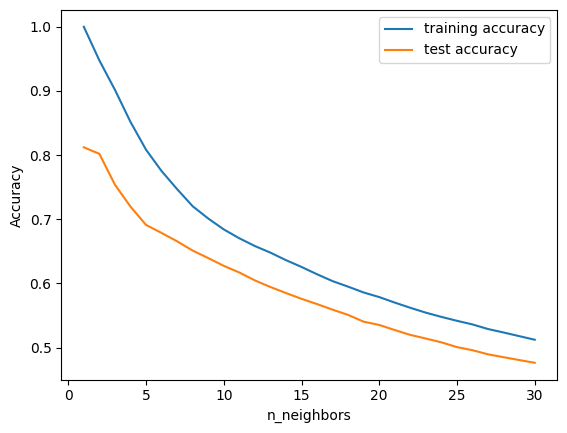

In [20]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

Linear Regression

In [18]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.288
Linear Regression: Accuracy on test Data: 0.296

Linear Regression: The RMSE of the training set is: 1.0129029956234736
Linear Regression: The RMSE of the testing set is: 1.0369865239324312


In [21]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Multilayer Perceptrons (MLPs): Deep Learning

In [22]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model 
mlp.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.936
Multilayer Perceptron Regression: Accuracy on test Data: 0.934

Multilayer Perceptron Regression: The RMSE of the training set is:  0.30407235791775583
Multilayer Perceptron Regression: The RMSE of the testing set is:  0.3167385873106729


In [23]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

In [24]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})


#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
2,Multilayer Perceptron Regression,0.936,0.934,0.304,0.317
0,k-Nearest Neighbors Regression,1.000,0.812,0.000,0.536
1,Linear Regression,0.288,0.296,1.013,1.037
